In [1]:
%pylab inline
import matplotlib.pyplot as plt



Populating the interactive namespace from numpy and matplotlib


In [144]:
import os
from scipy.stats import ttest_rel
import copy
import pickle
import pandas as pd
import copy

from sklearn.preprocessing import MinMaxScaler


import numpy as np
from numpy import linalg as LA
import scipy
from sklearn import preprocessing

from gensim.models import Word2Vec
from gensim import utils
from gensim.corpora import Dictionary

from scipy.stats.stats import spearmanr
from scipy.stats.stats import pearsonr


from sklearn.decomposition import PCA

In [145]:
we_model_name = "sg_dim300_min200_win5"
we_vector_size = 300

we_model_dir = "/share/home/navid/wordembeddings/word2vecgensim/wikipedia/wiki-english-20171001/%s" % we_model_name



In [146]:
we_model = Word2Vec.load(we_model_dir+'/model.gensim')

print ('loading done!')

loading done!


In [147]:
len(we_model.wv.vocab)

197549

### Define IAT experiments

In [148]:
iat_exps = {}

In [149]:
def add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label):
    iat_exps[exp_num] = {}
    iat_exps[exp_num]['X_terms'] = X_terms
    iat_exps[exp_num]['Y_terms'] = Y_terms
    iat_exps[exp_num]['A_terms'] = A_terms
    iat_exps[exp_num]['B_terms'] = B_terms
    iat_exps[exp_num]['X_label'] = X_label
    iat_exps[exp_num]['Y_label'] = Y_label
    iat_exps[exp_num]['A_label'] = A_label
    iat_exps[exp_num]['B_label'] = B_label


In [253]:
# IAT 1
exp_num = 1
X_label = 'Flowers'
Y_label = 'Insects'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['aster', 'clover', 'hyacinth', 'marigold', 'poppy', 'azalea', 
           'crocus', 'iris', 'orchid', 'rose', 'bluebell', 'daffodil','lilac',
           'pansy','tulip','buttercup','daisy','lily','penny','violet','carnation',
           'magnolia','petunia','zinnia'] # 'gladiola' is removed
Y_terms = ['ant','caterpillar','flea','locust','spider','centipede','fly',
          'maggot','tarantula','bee','cockroach','gnat','mosquito','termite','beetle',
          'cricket','hornet','moth','wasp','dragonfly','roach',
          'weevil'] # 'bedbug', 'blackfly', 'horsefly' are removed
A_terms = ['caress','freedom','health','love','peace','cheer','friend','heaven',
           'loyal','pleasure','diamond','gentle','honest','lucky','rainbow','diploma',
           'gift','honor','miracle','sunrise','family','happy','paradise',
           'vacation'] # 'laugher' is removed
B_terms = ['abuse','crash','filth','murder','sickness','accident','death',
          'poison','stink','assault','disaster','hatred','pollute','tragedy',
          'divorce','jail','poverty','ugly','cancer','kill','rotten','vomit','agony',
          'prison'] # 'grief' is removed
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])


add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [254]:
# IAT 2
exp_num = 2
X_label = 'Instruments'
Y_label = 'Weapons'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['bagpipe','cello','guitar','lute','trombone','banjo','clarinet','harmonica',
           'mandolin','trumpet','bassoon','drum','harp','oboe','tuba','bell','fiddle',
           'harpsichord','piano','viola','bongo','flute','horn','saxophone']
Y_terms = ['arrow','club','gun','missile','spear','axe','dagger','harpoon','pistol',
          'sword','blade','dynamite','hatchet','rifle','tank','bomb','firearm',
          'knife','shotgun','teargas','cannon','grenade','mace','slingshot','whip']
A_terms = ['caress','freedom','health','love','peace','cheer','friend','heaven',
           'loyal','pleasure','diamond','gentle','honest','lucky','rainbow','diploma',
           'gift','honor','miracle','sunrise','family','happy','paradise',
           'vacation'] # 'laugher' is removed
B_terms = ['abuse','crash','filth','murder','sickness','accident','death',
          'poison','stink','assault','disaster','hatred','pollute','tragedy',
          'divorce','jail','poverty','ugly','cancer','kill','rotten','vomit','agony',
          'prison'] #'grief' is removed
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [255]:
# IAT 3
exp_num = 3
X_label = 'Eur-Am Names'
Y_label = 'Afr-Am Names'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['roger','alan','frank','ian','justin',
          'ryan','andrew','fred','jack','matthew','stephen','brad','greg','jed',
          'paul','todd','brandon','hank','jonathan','peter','wilbur','amanda',
          'courtney','heather','melanie','sara','amber','crystal','katie',
          'meredith','shannon','betsy','donna','kristin','nancy','stephanie',
          'ellen','lauren','peggy','colleen','emily',
          'megan','rachel','wendy'] #'bobbie-sue', 'sue-ellen'
Y_terms = ['alonzo','jamel','theo','alphonse','jerome','leroy',
           'torrance','darnell','lamar','lionel','tyree','deion',
          'lamont','malik','terrence','tyrone','lavon',
          'wardell','nichelle','shereen','ebony',
          'jasmine','tanisha','tia','latoya','yolanda','malika','yvette'] # removed 'lerone', 'rashaun', 'terryl', 'aiesha', 'lashelle', 'temeka', 'latisha', 'shaniqua', 'tameisha', 'teretha', 'laronya', 'shanise', 'lakisha', 'sharise', 'tashika', 'lashandra', 'shavonn', 'tawanda'
A_terms = ['caress','freedom','health','love','peace','cheer','friend','heaven',
          'loyal','pleasure','diamond','gentle','honest','lucky','rainbow',
          'diploma','gift','honor','miracle','sunrise','family','happy','laughter',
          'paradise','vacation']
B_terms = ['abuse','crash','filth','murder','sickness','accident','death','grief',
          'poison','stink','assault','disaster','hatred','pollute','tragedy','bomb',
          'divorce','jail','poverty','ugly','cancer','evil','kill','rotten','vomit']
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [256]:
# IAT 4
exp_num = 4
X_label = 'Eur-Am Names'
Y_label = 'Afr-Am Names'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['Brad', 'Brendan', 'Geoffrey', 'Greg', 'Brett', 'Jay', 'Matthew', 'Neil',
'Todd', 'Allison', 'Anne', 'Carrie', 'Emily', 'Jill', 'Laurie', 'Kristen', 'Meredith',
           'Sarah']
Y_terms = ['Darnell', 'Hakim', 'Jermaine', 'Kareem', 'Jamal', 'Leroy', 'Rasheed',
'Tremayne', 'Tyrone', 'Aisha', 'Ebony', 'Keisha', 'Kenya', 'Latoya',
           'Tamika', 'Tanisha'] # 'Latonya', 'Lakisha'
A_terms = ['caress','freedom','health','love','peace','cheer','friend','heaven',
           'loyal','pleasure','diamond','gentle','honest','lucky','rainbow','diploma',
           'gift','honor','miracle','sunrise','family','happy','paradise',
           'vacation'] #'laugher'
B_terms = ['abuse','crash','filth','murder','sickness','accident','death',
          'poison','stink','assault','disaster','hatred','pollute','tragedy',
          'bomb','divorce','jail','poverty','ugly','cancer','evil','kill',
          'rotten','vomit'] # 'grief'
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [257]:
# IAT 5
exp_num = 5
X_label = 'Eur-Am Names'
Y_label = 'Afr-Am Names'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['Brad', 'Brendan', 'Geoffrey', 'Greg', 'Brett', 'Jay', 'Matthew', 'Neil',
'Todd', 'Allison', 'Anne', 'Carrie', 'Emily', 'Jill', 'Laurie', 'Kristen', 'Meredith',
           'Sarah']
Y_terms = ['Darnell', 'Hakim', 'Jermaine', 'Kareem', 'Jamal', 'Leroy', 'Rasheed', 
           'Tremayne', 'Tyrone', 'Aisha', 'Ebony', 'Keisha', 'Kenya', 'Latoya',
           'Tamika', 'Tanisha'] #'Latonya', 
A_terms = ['joy', 'love', 'peace', 'wonderful', 'pleasure', 'friend', 'laughter', 'happy']
B_terms = ['agony', 'terrible', 'horrible', 'nasty', 'evil', 'war', 'awful', 'failure']
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [258]:
# IAT 6
exp_num = 6
X_label = 'Male Names'
Y_label = 'Female Names'
A_label = 'Career'
B_label = 'Family'
X_terms = ['John', 'Paul','Mike','Kevin','Steve','Greg','Jeff','Bill']
Y_terms = ['Amy','Joan','Lisa','Sarah','Diana','Kate','Ann','Donna']
A_terms = ['executive','management','professional','corporation',
               'salary','office','business','career']
B_terms = ['home','parents','children','family',
               'cousins','marriage','wedding','relatives']
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [259]:
# IAT 7
exp_num = 7
X_label = 'Math'
Y_label = 'Arts'
A_label = 'Male'
B_label = 'Female'
X_terms = ['math','algebra','geometry','calculus',
             'equations','computation','numbers','addition']
Y_terms = ['poetry','art','dance','literature',
             'novel','symphony','drama','sculpture']
A_terms = ['male','man','boy','brother',
              'he','him','his','son']
B_terms = ['female','woman','girl','sister',
               'she','her','hers','daughter']
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [260]:
# IAT 8
exp_num = 8
X_label = 'Science'
Y_label = 'Arts'
A_label = 'Male'
B_label = 'Female'
X_terms = ['science','technology','physics','chemistry',
          'Einstein','NASA','experiment','astronomy']
Y_terms = ['poetry','art','Shakespeare','dance',
          'literature','novel','symphony','drama']
A_terms = ['brother','father','uncle','grandfather',
          'son','he','his','him']
B_terms = ['sister','mother','aunt','grandmother',
          'daughter','she','hers','her']
[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [261]:
# IAT 9
exp_num = 9
X_label = 'Mental Disease'
Y_label = 'Physical Disease'
A_label = 'Temporary'
B_label = 'Permanent'
X_terms = ['sad','hopeless','gloomy','tearful','miserable','depressed']
Y_terms = ['sick','illness','influenza','disease','virus','cancer']
A_terms = ['impermanent','unstable','variable','fleeting','short','brief',
          'occasional']
B_terms = ['stable','always','constant','persistent','chronic','prolonged','forever']

[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


In [262]:
# IAT 10
exp_num = 10
X_label = 'Young Names'
Y_label = 'Old Names'
A_label = 'Pleasant'
B_label = 'Unpleasant'
X_terms = ['Tiffany', 'Michelle', 'Cindy', 'Kristy', 'Brad', 'Eric', 'Joey', 'Billy']
Y_terms = ['Ethel', 'Bernice', 'Gertrude', 'Agnes', 'Cecil', 'Wilbert', 'Mortimer', 'Edgar']
A_terms = ['joy', 'love', 'peace', 'wonderful', 'pleasure', 'friend', 'laughter', 'happy']
B_terms = ['agony', 'terrible', 'horrible', 'nasty', 'evil', 'war', 'awful', 'failure']

[X_terms, Y_terms, A_terms, B_terms] = [[str.lower(term) for term in terms] for terms in [X_terms, Y_terms, A_terms, B_terms]]

print ('Missing X_terms:', [x for x in X_terms if x not in we_model.wv.vocab])
print ('Missing Y_terms:', [x for x in Y_terms if x not in we_model.wv.vocab])
print ('Missing A_terms:', [x for x in A_terms if x not in we_model.wv.vocab])
print ('Missing B_terms:', [x for x in B_terms if x not in we_model.wv.vocab])

add_experiment_definition(exp_num, X_terms, Y_terms, A_terms, B_terms, X_label, Y_label, A_label, B_label)


Missing X_terms: []
Missing Y_terms: []
Missing A_terms: []
Missing B_terms: []


## calculating bias

In [263]:

def get_1st_association(target_word, attribute_words):
    ctx_vecs = []
    for _word in attribute_words:
        _idx = we_model.wv.vocab[_word].index
        ctx_vecs.append(we_model.trainables.syn1neg[_idx])
    ctx_vecs = np.array(ctx_vecs)    
    
    _vec = we_model.wv[target_word]
    associations = scipy.special.expit(np.dot(ctx_vecs, _vec))
    association_mean = np.mean(associations)
    
    return association_mean

def get_1st_associations_allwords(attribute_words):
    ctx_vecs = []
    for _word in attribute_words:
        _idx = we_model.wv.vocab[_word].index
        ctx_vecs.append(we_model.trainables.syn1neg[_idx])
    ctx_vecs = np.array(ctx_vecs)    
    
    _vecs = we_model.wv.vectors
    associations = scipy.special.expit(np.dot(_vecs, ctx_vecs.T))
    associations_mean = np.mean(associations, axis=1)
    
    return associations_mean


def get_1st_bias(target_terms, A_terms, B_terms):
    
    allwords_A_associations = get_1st_associations_allwords(A_terms)
    allwords_B_associations = get_1st_associations_allwords(B_terms)
    
    all_associations = np.concatenate((allwords_A_associations, allwords_B_associations))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(all_associations.reshape(-1, 1)) 
    
    biases = {}
    for word in target_terms:
        _A_assoc = get_1st_association(word, A_terms)
        _B_assoc = get_1st_association(word, B_terms)
        _A_assoc = scaler.transform(_A_assoc.reshape(-1, 1))[0,0]
        _B_assoc = scaler.transform(_B_assoc.reshape(-1, 1))[0,0]
        biases[word] = _A_assoc - _B_assoc
    
    _th = np.mean(np.abs(allwords_A_associations - allwords_B_associations))
    _th = scaler.transform(_th.reshape(-1, 1))[0,0]
        
    return biases, _th
    
results_1st = {}
for exp_no in iat_exps:
    print (exp_no)
    X_metrics, _th = get_1st_bias(iat_exps[exp_no]['X_terms'], iat_exps[exp_no]['A_terms'], iat_exps[exp_no]['B_terms'])
    Y_metrics, _th = get_1st_bias(iat_exps[exp_no]['Y_terms'], iat_exps[exp_no]['A_terms'], iat_exps[exp_no]['B_terms'])
    
    results_1st[exp_no] = {}
    results_1st[exp_no]['X_mean'] = np.mean(list(X_metrics.values()))
    results_1st[exp_no]['X_biases'] = X_metrics
    results_1st[exp_no]['Y_mean'] = np.mean(list(Y_metrics.values()))
    results_1st[exp_no]['Y_biases'] = Y_metrics
    
    results_1st[exp_no]['threshold'] = _th
    
    #print ('mean bias to X', np.mean(list(X_metrics.values())))
    #print ('mean bias to Y', np.mean(list(Y_metrics.values())))

    #print ('Bias threshold', _th)
    #print ()


1
2
3
4
5
6
7
8
9
10


In [264]:

def get_2nd_association(target_word, attribute_words):
    target_vec = we_model.wv[target_word]
    attribute_vecs = np.array([we_model.wv[_w] for _w in attribute_words])
    
    _dot_v = np.dot(attribute_vecs, target_vec)
    _norms = np.multiply(np.linalg.norm(attribute_vecs, axis=1), np.linalg.norm(target_vec))
    _associations = np.divide(_dot_v, _norms)
    _association_mean = np.mean(_associations)
    
    return _association_mean

def get_2nd_mean_allwords(attribute_words):
    vecs = np.array([we_model.wv[_w] for _w in attribute_words])
    
    vecs_normalized = vecs/np.linalg.norm(vecs, axis=1).reshape(-1,1)
    vecs_normalized_allwords = we_model.wv.vectors/np.linalg.norm(we_model.wv.vectors, axis=1).reshape(-1,1)
    
    associations_allwords = np.dot(vecs_normalized, vecs_normalized_allwords.T)
    associations_mean_allwords = np.mean(associations_allwords, axis=0)
    
    return associations_mean_allwords

def get_2nd_bias(target_terms, A_terms, B_terms):
    allwords_A_associations = get_2nd_mean_allwords(A_terms)
    allwords_B_associations = get_2nd_mean_allwords(B_terms)
    
    all_associations = np.concatenate((allwords_A_associations, allwords_B_associations))
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(all_associations.reshape(-1, 1)) 
    
    _th = np.mean(np.abs(allwords_A_associations - allwords_B_associations))
    _th = scaler.transform(_th.reshape(-1, 1))[0,0]
        
    biases = {}
    for word in target_terms:
        _A_assoc = get_2nd_association(word, A_terms)
        _B_assoc = get_2nd_association(word, B_terms)
        _A_assoc = scaler.transform(_A_assoc.reshape(-1, 1))[0,0]
        _B_assoc = scaler.transform(_B_assoc.reshape(-1, 1))[0,0]
        biases[word] = _A_assoc - _B_assoc

    return biases, _th

results_2nd = {}
for exp_no in iat_exps:
    print (exp_no)
    X_metrics, _th = get_2nd_bias(iat_exps[exp_no]['X_terms'], iat_exps[exp_no]['A_terms'], iat_exps[exp_no]['B_terms'])
    Y_metrics, _th = get_2nd_bias(iat_exps[exp_no]['Y_terms'], iat_exps[exp_no]['A_terms'], iat_exps[exp_no]['B_terms'])
    #print (X_metrics)
    #print (Y_metrics)

    results_2nd[exp_no] = {}
    results_2nd[exp_no]['X_mean'] = np.mean(list(X_metrics.values()))
    results_2nd[exp_no]['X_biases'] = X_metrics
    results_2nd[exp_no]['Y_mean'] = np.mean(list(Y_metrics.values()))
    results_2nd[exp_no]['Y_biases'] = Y_metrics
    
    results_2nd[exp_no]['threshold'] = _th
    
    #print ('mean bias to X', )
    #print ('mean bias to Y', np.mean(list(Y_metrics.values())))

    #print ('Bias threshold', _th)
    #print ()

1
2
3
4
5
6
7
8
9
10


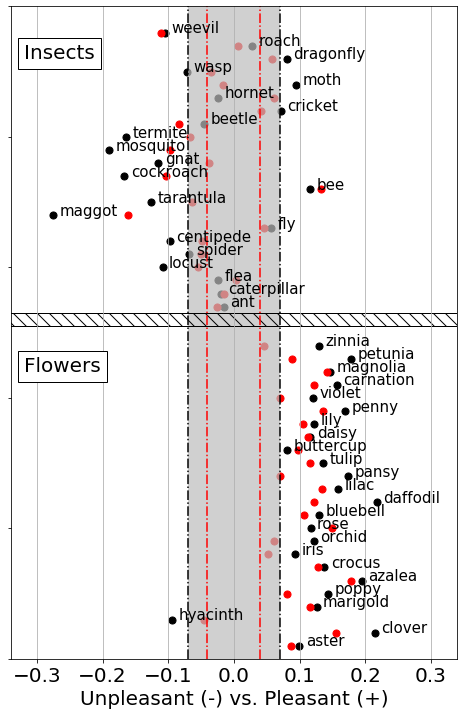

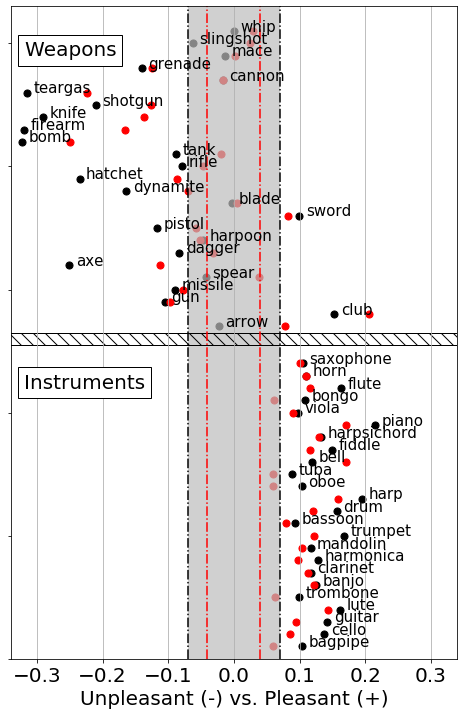

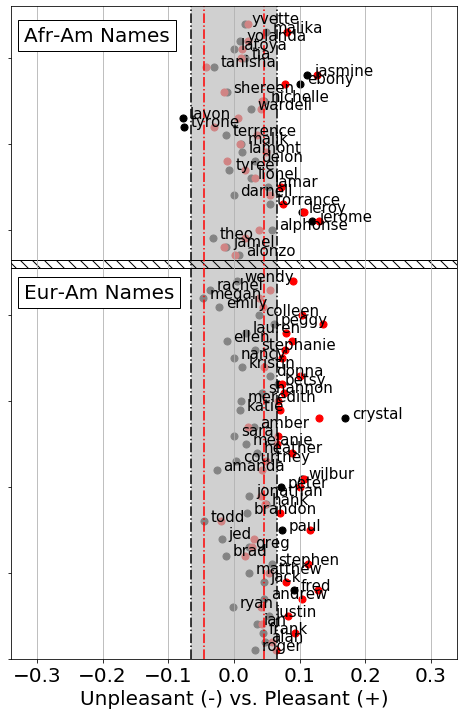

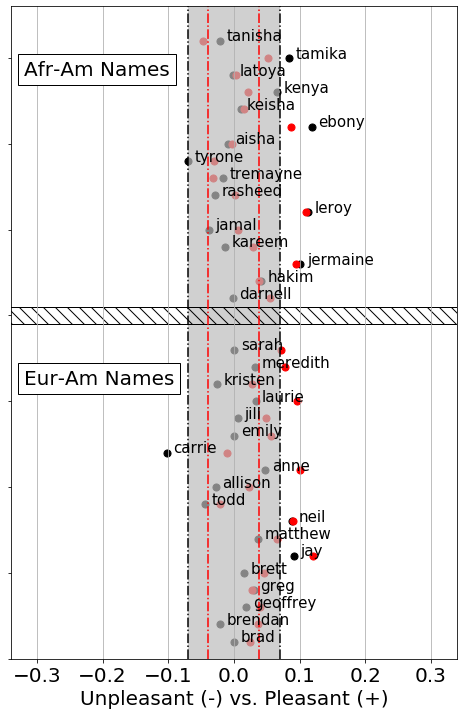

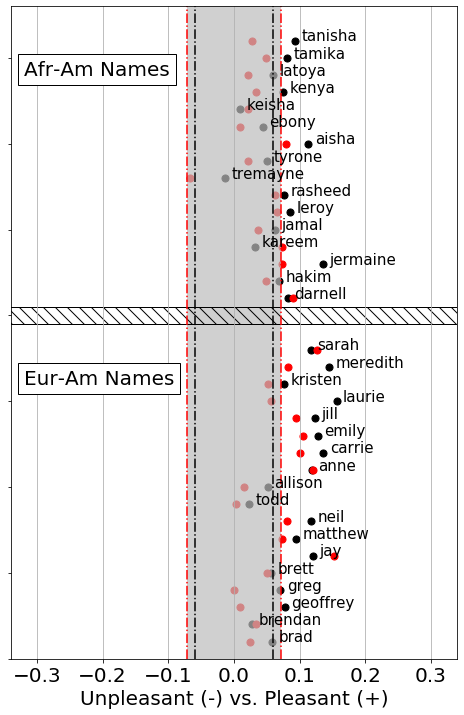

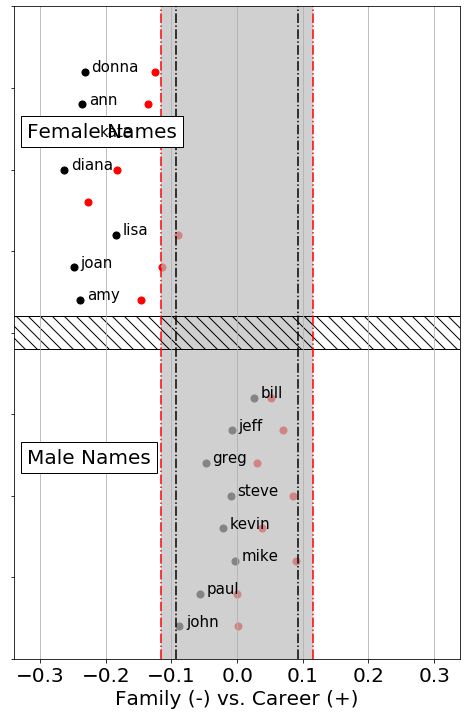

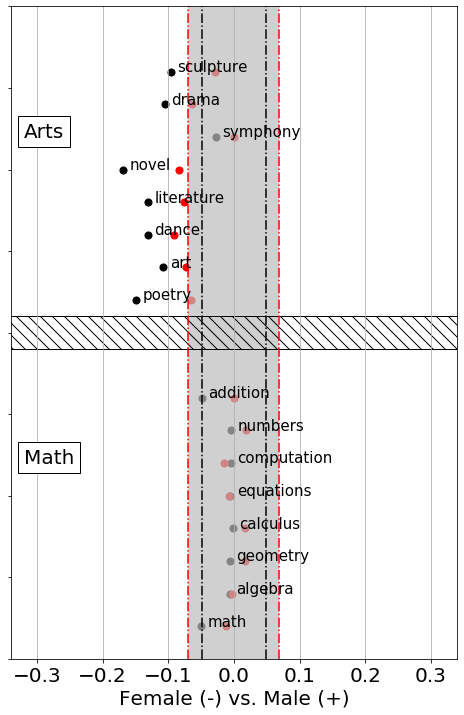

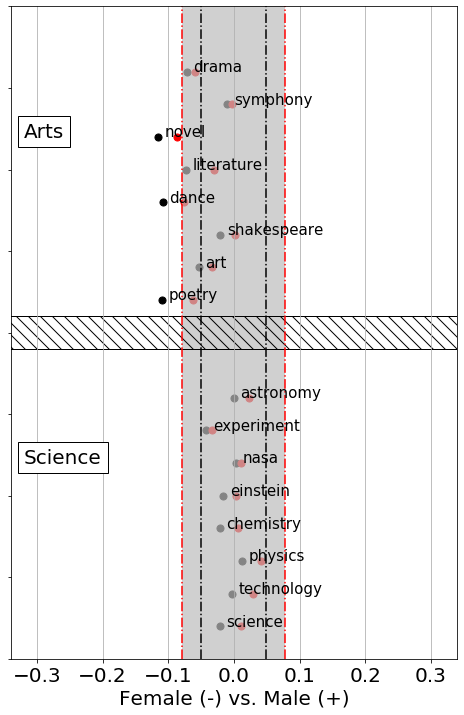

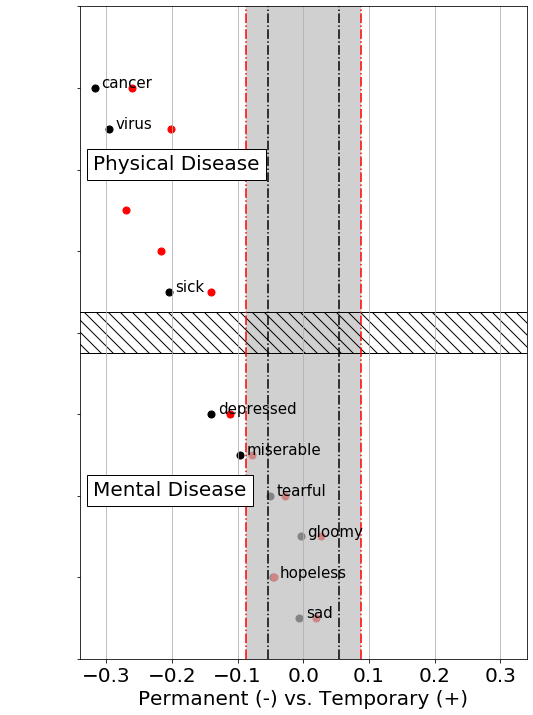

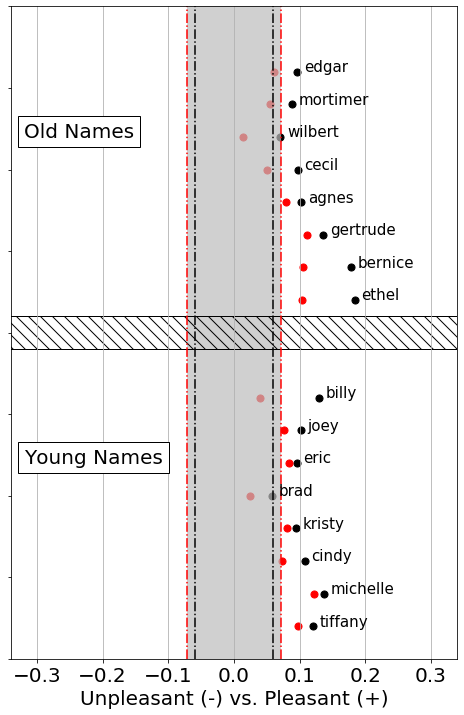

In [389]:
LEGEND_SIZE = 10
target_letters = ['X','Y']

_color_unbiasedarea='#bdbdbd'
_color_unbiasedarea2='red'
_color_unbiasedborder='black'#'#737373'
_color_unbiasedborder2='red'
_color_unbiasedpnt='#636363'
_color_SG_male='red'
_color_eSG_male='black'
_color_SG_female='#6baed6'#3182bd
_color_eSG_female='#08519c'


ZERO_LINE_COLOR = 'lime'
FIRST_ORDER_COLOR = 'black'
SECOND_ORDER_COLOR = 'red'
SHADE_DARKNESS = 0.2
XAXIS_LIMIT = 0.34
TITLE_FONT_SIZE = 12    
fsize = 20
fsize2 = 15
_psize = 50 # Marker size


for exp_no in iat_exps: 
    #if exp_no != 2:
    #    continue
    fig, ax = plt.subplots(1,1, figsize=(8,12))

    A_label = iat_exps[exp_no]['A_label']
    B_label = iat_exps[exp_no]['B_label']

    threshold_1st = results_1st[exp_no]['threshold']
    threshold_2nd = results_2nd[exp_no]['threshold']
    

    allterms = []
    target_labels = []
    biases_1st = []
    biases_2nd = []
    y_vals = []
    X_terms_count = 0
    for target_letter in target_letters:
        col = 0 if target_letter =='X' else 1
        #ax = axs[col]

        terms = iat_exps[exp_no]['%s_terms' % target_letter]
        allterms.extend(iat_exps[exp_no]['%s_terms' % target_letter])
        #allterms = allterms+['MEAN']
        target_label = iat_exps[exp_no]['%s_label' % target_letter]

        biases_1st.extend([results_1st[exp_no]['%s_biases' % target_letter][x] for x in terms])
        mean_1st = results_1st[exp_no]['%s_mean' % target_letter]
        #biases_1st.append(mean_1st)
        
        biases_2nd.extend([results_2nd[exp_no]['%s_biases' % target_letter][x] for x in terms])
        mean_2nd = results_2nd[exp_no]['%s_mean' % target_letter]
        #biases_2nd.append(mean_2nd)

        if col == 0:
            y_vals = [i for i in range(1, len(biases_1st) + 1)]
            X_terms_count = len(y_vals)
        else:
            y_vals.extend([i+X_terms_count+2 for i in range(1, len(biases_1st) - X_terms_count + 1)])
            
        ax.text(-XAXIS_LIMIT+0.02, y_vals[-1]-2, target_label, size=fsize, bbox=dict(boxstyle="square", fc="w", ec="k"))
        
    ax.scatter(biases_1st, y_vals, marker='o', c=FIRST_ORDER_COLOR, s=_psize)
    ax.scatter(biases_2nd, y_vals, marker='o', c=SECOND_ORDER_COLOR, s=_psize)

    ax.axvline(threshold_1st, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
    ax.axvline(threshold_2nd, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    ax.axvline(-threshold_1st, c=FIRST_ORDER_COLOR, linestyle='-.')
    ax.axvline(-threshold_2nd, color=SECOND_ORDER_COLOR, linestyle='-.')
    
    ax.fill([-1, 1, 1, -1], [X_terms_count+1.5, X_terms_count+1.5, X_terms_count+2.5, X_terms_count+2.5], fill=False, hatch='\\\\')
    
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

    for i, txt in enumerate(allterms):
        ax.annotate(txt, (biases_1st[i]+0.01, y_vals[i]+0.01), fontsize=fsize2)

    ax.set_xlabel('%s (-) vs. %s (+)' % (B_label, A_label), fontsize=fsize)
    ax.yaxis.set_ticklabels([])

    max_y = max(y_vals) + 2
    ax.fill_between([-max(threshold_1st,threshold_2nd),max(threshold_1st,threshold_2nd)],
                    [0, 0], [max_y, max_y], facecolor=_color_unbiasedarea, alpha=0.7, interpolate=True)


    ax.set_ylim(0, max_y)


    ax.xaxis.grid()
    #ax.legend(loc=2, prop={'size': LEGEND_SIZE})
    ax.tick_params(which='major', labelsize=fsize)

    plt.show()
    fig.tight_layout()
    fig.set_size_inches(8, 12)
    fig.savefig('plots/iat_%d_bias_LONG.pdf' % exp_no, dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)



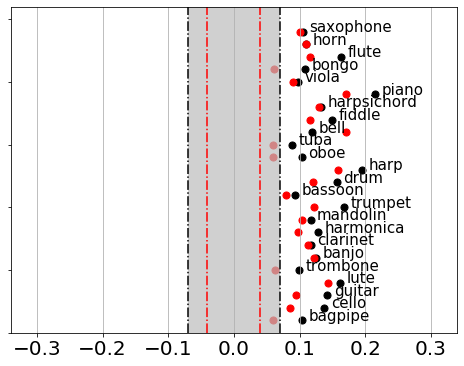

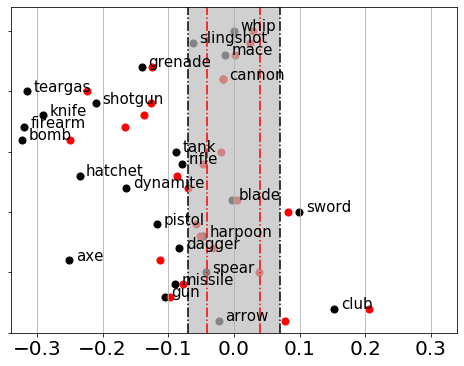

In [339]:
LEGEND_SIZE = 10
target_letters = ['X','Y']

_color_unbiasedarea='#bdbdbd'
_color_unbiasedarea2='red'
_color_unbiasedborder='black'#'#737373'
_color_unbiasedborder2='red'
_color_unbiasedpnt='#636363'
_color_SG_male='red'
_color_eSG_male='black'
_color_SG_female='#6baed6'#3182bd
_color_eSG_female='#08519c'


ZERO_LINE_COLOR = 'lime'
FIRST_ORDER_COLOR = 'black'
SECOND_ORDER_COLOR = 'red'
SHADE_DARKNESS = 0.2
XAXIS_LIMIT = 0.34
TITLE_FONT_SIZE = 12    
fsize = 20
fsize2 = 15
_psize = 50 # Marker size



for exp_no in iat_exps: 
    if exp_no != 2:
        continue
    
    A_label = iat_exps[exp_no]['A_label']
    B_label = iat_exps[exp_no]['B_label']

    threshold_1st = results_1st[exp_no]['threshold']
    threshold_2nd = results_2nd[exp_no]['threshold']
    

    for target_letter in target_letters:
        fig, ax = plt.subplots(1,1, figsize=(8,6))

        allterms = []
        target_labels = []
        biases_1st = []
        biases_2nd = []
        y_vals = []
        X_terms_count = 0

        col = 0 if target_letter =='X' else 1
        #ax = axes[col]

        terms = iat_exps[exp_no]['%s_terms' % target_letter]
        allterms.extend(iat_exps[exp_no]['%s_terms' % target_letter])
        #allterms = allterms+['MEAN']
        target_label = iat_exps[exp_no]['%s_label' % target_letter]

        biases_1st.extend([results_1st[exp_no]['%s_biases' % target_letter][x] for x in terms])
        mean_1st = results_1st[exp_no]['%s_mean' % target_letter]
        #biases_1st.append(mean_1st)
        
        biases_2nd.extend([results_2nd[exp_no]['%s_biases' % target_letter][x] for x in terms])
        mean_2nd = results_2nd[exp_no]['%s_mean' % target_letter]
        #biases_2nd.append(mean_2nd)

        y_vals = [i for i in range(1, len(biases_1st) + 1)]
        X_terms_count = len(y_vals)
            
        #ax.text(-XAXIS_LIMIT+0.02, y_vals[-1]-1, target_label, size=fsize, bbox=dict(boxstyle="square", fc="w", ec="k"))
        
        ax.scatter(biases_1st, y_vals, marker='o', c=FIRST_ORDER_COLOR, s=_psize)
        ax.scatter(biases_2nd, y_vals, marker='o', c=SECOND_ORDER_COLOR, s=_psize)

        ax.axvline(threshold_1st, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
        ax.axvline(threshold_2nd, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
        ax.axvline(-threshold_1st, c=FIRST_ORDER_COLOR, linestyle='-.')
        ax.axvline(-threshold_2nd, color=SECOND_ORDER_COLOR, linestyle='-.')

        ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

        for i, txt in enumerate(allterms):
            ax.annotate(txt, (biases_1st[i]+0.01, y_vals[i]+0.01), fontsize=fsize2)

        #ax.set_xlabel('Inclination (bias): %s (-) vs. %s (+)' % (B_label, A_label), fontsize=fsize)
        ax.yaxis.set_ticklabels([])

        max_y = max(y_vals) + 2
        ax.fill_between([-max(threshold_1st,threshold_2nd),max(threshold_1st,threshold_2nd)],
                        [0, 0], [max_y, max_y], facecolor=_color_unbiasedarea, alpha=0.7, interpolate=True)


        ax.set_ylim(0, max_y)


        ax.xaxis.grid()
        #ax.legend(loc=2, prop={'size': LEGEND_SIZE})
        ax.tick_params(which='major', labelsize=fsize)

        plt.show()
        fig.tight_layout()
        fig.set_size_inches(8, 6)
        fig.savefig('plots/iat_%d_bias_%s.pdf' % (exp_no, target_letter), dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)




In [285]:

for exp_no in iat_exps:  
    
    text = ""
    text += '\\multirow{3}{*}{\\#%d} &' % exp_no
    text += "\\textit{Unbiased range} & "
    text += " $|%0.2f|\\geq$ & " % results_2nd[exp_no]['threshold']
    text += " $|%0.2f|\\geq$ &" % results_1st[exp_no]['threshold']
    text += '\\multirow{3}{1.6cm}{%s (-) vs. %s (+)} \\\\' % (iat_exps[exp_no]['B_label'], iat_exps[exp_no]['A_label'])
    print (text)
    
    text = " & "
    text += " %s & " % iat_exps[exp_no]['X_label']
    if abs(results_2nd[exp_no]['X_mean']) > results_2nd[exp_no]['threshold']:
        _txt = "\\textbf{%0.2f}" % results_2nd[exp_no]['X_mean']
    else:
        _txt = "%0.2f" % results_2nd[exp_no]['X_mean']
    text += " %s & " % _txt
    if abs(results_1st[exp_no]['X_mean']) > results_1st[exp_no]['threshold']:
        _txt = "\\textbf{%0.2f}" % results_1st[exp_no]['X_mean']
    else:
        _txt = "%0.2f" % results_1st[exp_no]['X_mean']
    text += " %s & \\\\" % _txt
    print (text)
    
    text = " & "
    text += " %s & " % iat_exps[exp_no]['Y_label']
    if abs(results_2nd[exp_no]['Y_mean']) > results_2nd[exp_no]['threshold']:
        _txt = "\\textbf{%0.2f}" % results_2nd[exp_no]['Y_mean']
    else:
        _txt = "%0.2f" % results_2nd[exp_no]['Y_mean']
    text += " %s & " % _txt
    if abs(results_1st[exp_no]['Y_mean']) > results_1st[exp_no]['threshold']:
        _txt = "\\textbf{%0.2f}" % results_1st[exp_no]['Y_mean']
    else:
        _txt = "%0.2f" % results_1st[exp_no]['Y_mean']
    text += " %s & \\\\\\cdashlinelr{1-5}" % _txt
    print (text)
    
    
    

\multirow{3}{*}{\#1} &\textit{Unbiased range} &  $|0.04|\geq$ &  $|0.07|\geq$ &\multirow{3}{1.6cm}{Unpleasant (-) vs. Pleasant (+)} \\
 &  Flowers &  \textbf{0.10} &  \textbf{0.13} & \\
 &  Insects &  -0.03 &  -0.05 & \\\cdashlinelr{1-5}
\multirow{3}{*}{\#2} &\textit{Unbiased range} &  $|0.04|\geq$ &  $|0.07|\geq$ &\multirow{3}{1.6cm}{Unpleasant (-) vs. Pleasant (+)} \\
 &  Instruments &  \textbf{0.11} &  \textbf{0.13} & \\
 &  Weapons &  \textbf{-0.05} &  \textbf{-0.11} & \\\cdashlinelr{1-5}
\multirow{3}{*}{\#3} &\textit{Unbiased range} &  $|0.05|\geq$ &  $|0.07|\geq$ &\multirow{3}{1.6cm}{Unpleasant (-) vs. Pleasant (+)} \\
 &  Eur-Am Names &  \textbf{0.07} &  0.03 & \\
 &  Afr-Am Names &  0.03 &  0.02 & \\\cdashlinelr{1-5}
\multirow{3}{*}{\#4} &\textit{Unbiased range} &  $|0.04|\geq$ &  $|0.07|\geq$ &\multirow{3}{1.6cm}{Unpleasant (-) vs. Pleasant (+)} \\
 &  Eur-Am Names &  \textbf{0.05} &  0.01 & \\
 &  Afr-Am Names &  0.03 &  0.02 & \\\cdashlinelr{1-5}
\multirow{3}{*}{\#5} &\texti

## Analysis of Bias

In [387]:
#the most important context words contributing to bias using 2nd_mean on rec vectors

for exp_no in range(1, 11):
    print (exp_no)
    
    _lst = [('X', w, results_2nd[exp_no]['X_biases'][w] - results_1st[exp_no]['X_biases'][w]) for w in results_2nd[exp_no]['X_biases']]
    _lst += [('Y', w, - results_2nd[exp_no]['Y_biases'][w] + results_1st[exp_no]['Y_biases'][w]) for w in results_2nd[exp_no]['Y_biases']]
    _lst.sort (key=lambda x: x[2], reverse=True)
    _lst = _lst[:3]
    #print (_lst)
    
    for _tuple in _lst:
        _XorY = _tuple[0]
        _target_word = _tuple[1]
        
        _target_vec = scipy.special.expit(np.dot(we_model.wv[_target_word], we_model.trainables.syn1neg.T))

        _A_recSG_mean = np.zeros(len(_target_vec))
        for _att_word in iat_exps[exp_no]['A_terms']:
            _rec_vec = scipy.special.expit(np.dot(we_model.wv[_att_word], we_model.trainables.syn1neg.T))
            _A_recSG_mean += (_target_vec/LA.norm(_target_vec)) * (_rec_vec/LA.norm(_rec_vec))
        _A_recSG_mean /= len(iat_exps[exp_no]['A_terms'])

        _B_recSG_mean = np.zeros(len(_target_vec))
        for _att_word in iat_exps[exp_no]['B_terms']:
            _rec_vec = scipy.special.expit(np.dot(we_model.wv[_att_word], we_model.trainables.syn1neg.T))
            _B_recSG_mean += (_target_vec/LA.norm(_target_vec)) * (_rec_vec/LA.norm(_rec_vec))
        _B_recSG_mean /= len(iat_exps[exp_no]['B_terms'])

        _bias_recSG_mean = _A_recSG_mean - _B_recSG_mean

        _mult = list(zip((_bias_recSG_mean), we_model.wv.index2word))

        _mult.sort(key=lambda x:x[0], reverse=True)
        if _XorY == 'X':
            print ('\\textit{\\textbf{%s}} inclined towards \\textit{%s}: %s' % (_target_word, iat_exps[exp_no]['A_label'], ', '.join([x[1] for x in _mult][:5])))
        else:
            print ('\\textit{\\textbf{%s}} inclined towards \\textit{%s}: %s' % (_target_word, iat_exps[exp_no]['B_label'], ', '.join([x[1] for x in _mult][::-1][:5])))
        print ()


    #masc_recSG_vecs = []



1
\textit{\textbf{moth}} inclined towards \textit{Unpleasant}: widespread, fungus, pest, gory, thersites

\textit{\textbf{hyacinth}} inclined towards \textit{Pleasant}: flower, stakes, blessed, neoregelia, filly

\textit{\textbf{beetle}} inclined towards \textit{Unpleasant}: rotting, infested, dung, feces, stink

2
\textit{\textbf{bell}} inclined towards \textit{Pleasant}: bells, jingle, chimes, chime, flower

\textit{\textbf{sword}} inclined towards \textit{Unpleasant}: stabbing, stabbed, wounds, deadly, inflicts

\textit{\textbf{harpoon}} inclined towards \textit{Unpleasant}: kills, stabbing, weapon, deadly, knife

3
\textit{\textbf{ellen}} inclined towards \textit{Pleasant}: filly, degeneres, ladies, curated, stakes

\textit{\textbf{rachel}} inclined towards \textit{Pleasant}: filly, stakes, joy, lovely, idolator

\textit{\textbf{wendy}} inclined towards \textit{Pleasant}: filly, stakes, darling, curated, dear

4
\textit{\textbf{carrie}} inclined towards \textit{Pleasant}: joy, repr